In [1]:
from __future__ import annotations

import sys
sys.path.append("../StateVecSimulator/latte")
sys.path.append("../StateVecSimulator")

import numpy as np

import simulation
import importlib
import _vec_intercept_sampler
import _noise
import vec_sim
importlib.reload(vec_sim)
importlib.reload(simulation)
importlib.reload(_vec_intercept_sampler)
importlib.reload(_noise)
from _vec_intercept_sampler import VecInterceptSampler
from _noise import NoiseModel
from simulation import *
from IPython import display
import matplotlib.pyplot as plt
import stim
import sinter
from tqdm.notebook import tqdm
from pyperclip import copy

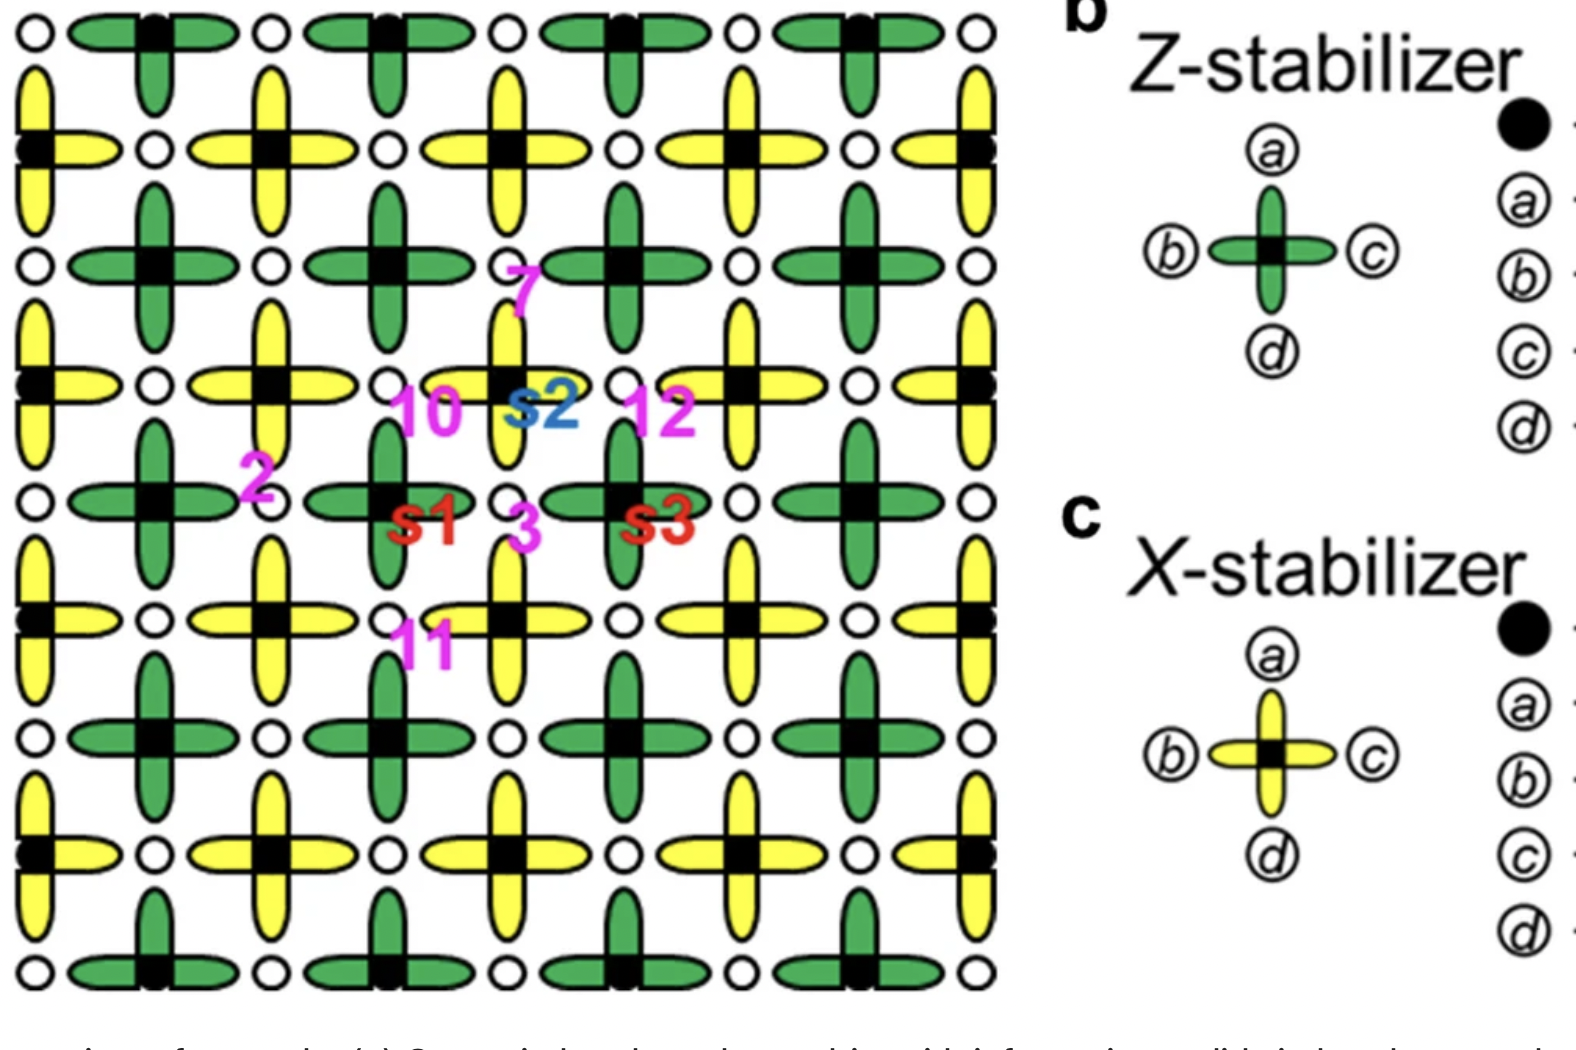

In [2]:
from PIL import Image
img = Image.open("./fig/unrotated.png")
width, height = img.size
new_width = width 
new_height = height 
cropped_img = img.crop((0, 0, new_width, new_height))
cropped_img.save("./fig/unrotated_cropped.png")
display.Image("./fig/unrotated_cropped.png", width=300, height=300)

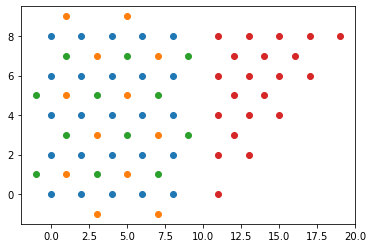

In [ ]:
simulation = sim_d3 = RotatedSurfaceCodeSimulation(d = 3)
d5_simulation = RotatedSurfaceCodeSimulation(d = 5)
d5_simulation.plot()

In [ ]:
# rotated_init_x_circuit = simulation_rotated.generate_init_circuit(basis = 'x')
# rotated_injection_circuit_HXY_init_x = simulation_rotated.generate_injection_circuit_HXY(init_basis = 'x')

# rotated_init_x_injection_double_HXY = rotated_init_x_circuit + rotated_injection_circuit_HXY_init_x + rotated_double_ghz_circuit_HXY


In [ ]:
init_x_circuit = simulation.generate_init_circuit(basis = 'x')
injection_HXY_init_x = simulation.generate_injection_circuit_HXY(init_basis = 'x')
double_ghz_HXY = simulation.generate_projection_double_ghz_HXY()
double_ghz_CZ = simulation.generate_projection_double_ghz_HXY(replace_phase_kickback = True, target_gate = CX)
d3_circuit = init_x_circuit + injection_HXY_init_x + double_ghz_CZ
d5_simulation, d3_circuit_expanded = d3_circuit.expand_simulation(new_distance = 5)
expansion_circuit = d5_simulation.circuit_from_stim_file("./circuits/CrumbleEdits/rotated_collaps_d5_to_d3.stim",reverse = True)
double_ghz_d5 = d5_simulation.generate_projection_double_ghz_HXY()
d5_circuit = expansion_circuit + double_ghz_d5
d5_circuit_with_syndromes = expansion_circuit + d5_simulation.generate_syndrome_circuit() + double_ghz_d5

small_circuit = d3_circuit_expanded.to_stim_circuit(noise_model = NoiseModel().uniform_depolarizing(1e-3), p = 1e-3, apply_non_cliffords = False, non_clifford_noise_strategy = 'CZ_HXY', measure_logical_operator=False,post_select_syndromes=False)
larger_circuit = d5_circuit.to_stim_circuit(noise_model = NoiseModel().uniform_depolarizing(1e-3), p = 1e-3, apply_non_cliffords = False, non_clifford_noise_strategy = 'CX_HXY', logical_measurement_basis = 'x')
larger_circuit_with_syndromes = d5_circuit_with_syndromes.to_stim_circuit(noise_model = NoiseModel().uniform_depolarizing(1e-3), p = 1e-3, apply_non_cliffords = False, non_clifford_noise_strategy = 'CX_HXY', logical_measurement_basis = 'x')

full_circuit = small_circuit + larger_circuit
full_circuit_with_syndromes = small_circuit + larger_circuit_with_syndromes
expansion_circuit_stim = d5_simulation.stim_expansion_circuit(d2 = 11, rounds = 11,logical_measurement_basis = 'x')

In [ ]:
res = full_circuit_with_syndromes + expansion_circuit_stim

In [ ]:
full_circuit.detector_error_model();
full_circuit_with_syndromes.detector_error_model();

In [ ]:
expanded_circ_stim = d5_circuit_with_syndromes.to_stim_circuit(noise_model = NoiseModel().uniform_depolarizing(1e-3), p = 1e-3, apply_non_cliffords = False, 
                                             non_clifford_noise_strategy = 'CX_HXY', logical_measurement_basis = 'x',
                                             post_select_syndromes = False, measure_logical_operator = False) + 

In [ ]:
expanded_circ_stim.detector_error_model()

ValueError: The circuit contains non-deterministic observables.
The circuit contains non-deterministic detectors.

To make an SVG picture of the problem, you can use the python API like this:
    your_circuit.diagram('detslice-with-ops-svg', tick=range(0, 5), filter_coords=['D0', 'D46', 'D70', 'L0', ])
or the command line API like this:
    stim diagram --in your_circuit_file.stim --type detslice-with-ops-svg --tick 0:5 --filter_coords D0:D46:D70:L0 > output_image.svg

This was discovered while analyzing qubit initialization into |0> at the start of the circuit on:
    qubit 0 [coords (0, 0)]

The collapse anti-commuted with these detectors/observables:
    D0
    D46
    D70 [coords (1, 1)]
    L0

The backward-propagating error sensitivity for D0 was:
    X0 [coords (0, 0)]
    X1 [coords (0, 2)]
    X5 [coords (2, 0)]
    X6 [coords (2, 2)]

The backward-propagating error sensitivity for D46 was:
    X0 [coords (0, 0)]
    X1 [coords (0, 2)]
    X5 [coords (2, 0)]
    X6 [coords (2, 2)]

The backward-propagating error sensitivity for D70 was:
    X0 [coords (0, 0)]
    X1 [coords (0, 2)]
    X5 [coords (2, 0)]
    X6 [coords (2, 2)]

The backward-propagating error sensitivity for L0 was:
    X0 [coords (0, 0)]
    X1 [coords (0, 2)]
    X2 [coords (0, 4)]

In [428]:
copy(str(expanded_circ_stim))

In [413]:
copy(str(d5_simulation.stim_expansion_circuit(d2 = 11, rounds = 11,logical_measurement_basis = 'x')))

stim.Circuit('''
    TICK
    QUBIT_COORDS(1, 13) 70
    QUBIT_COORDS(1, 17) 71
    QUBIT_COORDS(1, 21) 72
    QUBIT_COORDS(3, 11) 73
    QUBIT_COORDS(3, 15) 74
    QUBIT_COORDS(3, 19) 75
    QUBIT_COORDS(5, 13) 76
    QUBIT_COORDS(5, 17) 77
    QUBIT_COORDS(5, 21) 78
    QUBIT_COORDS(7, 11) 79
    QUBIT_COORDS(7, 15) 80
    QUBIT_COORDS(7, 19) 81
    QUBIT_COORDS(9, 1) 82
    QUBIT_COORDS(9, 5) 83
    QUBIT_COORDS(9, 9) 84
    QUBIT_COORDS(9, 13) 85
    QUBIT_COORDS(9, 17) 86
    QUBIT_COORDS(9, 21) 87
    QUBIT_COORDS(11, -1) 88
    QUBIT_COORDS(11, 3) 89
    QUBIT_COORDS(11, 7) 90
    QUBIT_COORDS(11, 11) 91
    QUBIT_COORDS(11, 15) 92
    QUBIT_COORDS(11, 19) 93
    QUBIT_COORDS(13, 1) 94
    QUBIT_COORDS(13, 5) 95
    QUBIT_COORDS(13, 9) 96
    QUBIT_COORDS(13, 13) 97
    QUBIT_COORDS(13, 17) 98
    QUBIT_COORDS(13, 21) 99
    QUBIT_COORDS(15, -1) 100
    QUBIT_COORDS(15, 3) 101
    QUBIT_COORDS(15, 7) 102
    QUBIT_COORDS(15, 11) 103
    QUBIT_COORDS(15, 15) 104
    QUBIT_COORDS(

In [397]:
copy(str(full_circuit_with_syndromes))

In [398]:
copy(str(full_circuit))

In [307]:
small_circuit.detector_error_model();
# larger_circuit.detector_error_model();
full_circuit.detector_error_model()

stim.DetectorErrorModel('''
    error(0.00425159) D0
    error(0.000533333) D0 D2 D12 D14 D18 D42 D45 D58 D73 D86 D89
    error(0.00286063) D0 D2 D12 D14 D42 D45 D86 D89
    error(0.00259527) D0 D3 D12 D15 D42 D46 D85 D89
    error(6.66978e-05) D0 D4 D8 D12 D13 D17 D18 D42 D43 D56 D58 D73 D75 D88 D89
    error(0.000200067) D0 D4 D8 D12 D13 D17 D42 D43 D56 D75 D88 D89
    error(6.66978e-05) D0 D4 D8 D12 D13 D18 D42 D43 D58 D73 D88 D89
    error(0.000200067) D0 D4 D8 D12 D13 D42 D43 D88 D89
    error(6.66978e-05) D0 D4 D8 D12 D17 D18 D42 D56 D58 D73 D75 D89 L0
    error(0.000799831) D0 D4 D8 D12 D17 D42 D56 D75 D89 L0
    error(6.66978e-05) D0 D4 D8 D12 D18 D42 D58 D73 D89 L0
    error(0.00570493) D0 D4 D8 D12 D42 D89 L0
    error(0.000200067) D0 D12 D15 D17 D18 D42 D46 D56 D58 D73 D75 D85 D89
    error(6.66978e-05) D0 D12 D15 D17 D42 D46 D56 D75 D85 D89
    error(0.000200067) D0 D12 D15 D18 D42 D46 D58 D73 D85 D89
    error(0.00059996) D0 D12 D15 D42 D46 D85 D89
    error(0.000200067) D